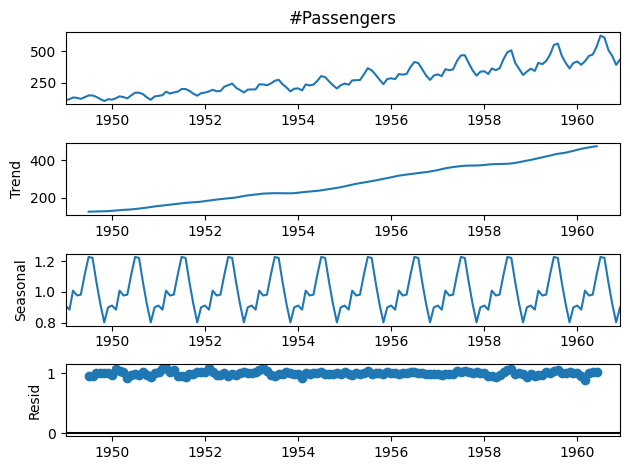

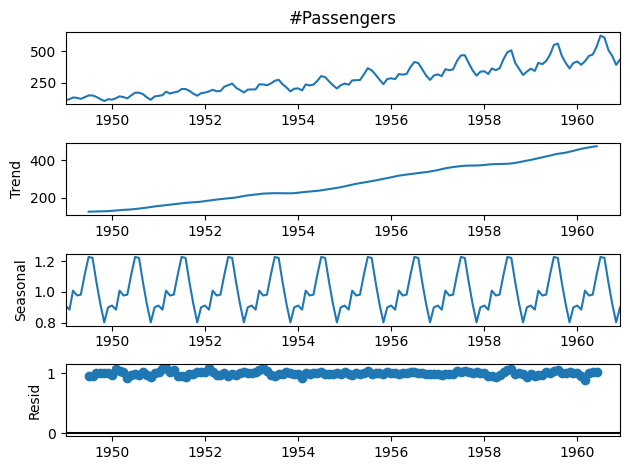

In [20]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the AirPassengers dataset
airline = pd.read_csv("D:\AirPassengers.csv",
					index_col ='Month',
					parse_dates = True)

# Print the first five rows of the dataset
airline.head()

# ETS Decomposition
result = seasonal_decompose(airline['#Passengers'],
							model ='multiplicative')

# ETS plot
result.plot()


In [21]:
airline.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
# To install the library


# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.63 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.84 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.75 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.83 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.62 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.22 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.57 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.99 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.33 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=4.43 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sun, 09 Apr 2023   AIC                           1019.178
Time:                                     11:24:09   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
#Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['#Passengers'],
				order = (0, 1, 1),
				seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.012
Date:                            Sun, 09 Apr 2023   AIC                            896.025
Time:                                    11:56:06   BIC                            909.920
Sample:                                01-01-1949   HQIC                           901.667
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2986      0.075     -4.003      0.000      -0.445      -0.152
ar.S.L12       0.7098      0.204      3.482      0.000       0.310       1.109
ar.S.L24       0.2895      0.100      2.907      0.004       0.094       0.485
ma.S.L12      -0.9814      1.994     -0.492      0.623      -4.890       2.928
sigma2        88.1752    159.350      0.553      0.580    -224.144     400.495
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

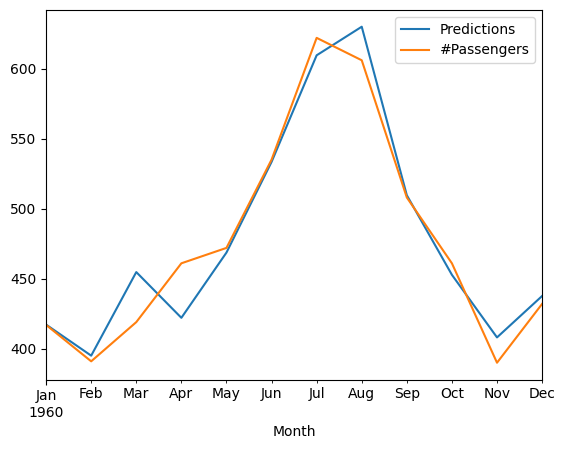

In [31]:
start = len(train)
end = len(test)+len(train)-1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)
plt.savefig('F:/SalesForecasting/salesForecast/src/assets/img/forecast.png')

In [9]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["#Passengers"], predictions)

# Calculate mean squared error
mean_squared_error(test["#Passengers"], predictions)


293.90764551725215

In [49]:
# Train the model on the full dataset
model = model = SARIMAX(airline['#Passengers'],
						order = (0, 1, 1),
						seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = '1949-01-01',


						end ='1960-'+ 3+'-01' ,
						typ = 'levels').rename('Forecast')

# Plot the forecast values
airline['#Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)


TypeError: can only concatenate str (not "int") to str